<a href="https://colab.research.google.com/github/nasif-raihan/ML-and-DL-Codes/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* [Dataset](https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/)
* [Resource](https://courses.analyticsvidhya.com/courses/take/creating-time-series-forecast-using-python/texts/10561500-getting-the-system-ready-and-loading-data)
* [Code](https://nbviewer.jupyter.org/github/anirudhpillai16/Time-Series-Analysis/blob/master/Time%20Series%20Analytics%20Vidhya.ipynb)


**Problem Statement:**

*Traffic data of JetRail are provided. We need to forecast the traffic on JetRail for next 7 months.*


**Hypothesis Generation:**


*   There will be an increase in the traffic as the years pass by.
*   The traffic will be high from May to October.
*   Traffic on weekdays will be more as compared to weekends/holidays.
*   Traffic during the peak hours will be high.


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import datetime
from pandas import Series

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/datasets')

Mounted at /content/datasets


In [3]:
path = '/content/datasets/MyDrive/Datasets/Time Series Forecasting (AV)/'

train = pd.read_csv(os.path.join(path + 'train.csv'))
test = pd.read_csv(os.path.join(path + 'test.csv'))

train.shape, test.shape

((18288, 3), (5112, 2))

Let's make a copy of train and test data so that even we change in these datasets we don't lose the original datasets.

In [4]:
train_original = train.copy()
test_original = test.copy()

train_original.shape, test_original.shape

((18288, 3), (5112, 2))

Let's have a look at the features of train and test dataset.

In [5]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [6]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

Let's look at the data type of each features.

In [7]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [8]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [9]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


# Feature Extraction
Let's extract the time and date from the Datetime.

In [10]:
train['Datetime'] = pd.to_datetime(train.Datetime, format= '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format= '%d-%m-%Y %H:%M')

train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [11]:
for i in (train, test):
  i['year'] = i.Datetime.dt.year
  i['month'] = i.Datetime.dt.month
  i['day'] = i.Datetime.dt.day
  i['Hour'] = i.Datetime.dt.hour

In [12]:
train.shape, test.shape

((18288, 7), (5112, 6))

In [13]:
train.head(2)

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1


Let's work on portraying our hypothesis. Now we make a weekend variable to visualize the impact of weekend on traffic.



In [14]:
train['day of week'] = train['Datetime'].dt.dayofweek

#temp = train['Datetime']

train.head(2)

,ID,Datetime,Count,year,month,day,Hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5


Note. **Aug 25, 2012 -> Saturday.**

The day of the week with Monday=0, Sunday=6.

In [15]:
def week_flag(row):
  if row.dayofweek == 5 or row.dayofweek == 6:
    return 1
  else:
    return 0

In [16]:
temp = train['Datetime'].apply(week_flag)
# print(temp2)

train['weekend'] = temp

train.head(2)

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1


Indexing the Datetime to get the time period on the X-axis.

In [17]:
train.index = train['Datetime']

train.head(3)

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1


Now we drop ID variable to get only the Datetime on X-axis.

In [18]:
df = train.drop('ID', 1)

df.head(3)

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1


In [19]:
train.shape

(18288, 9)

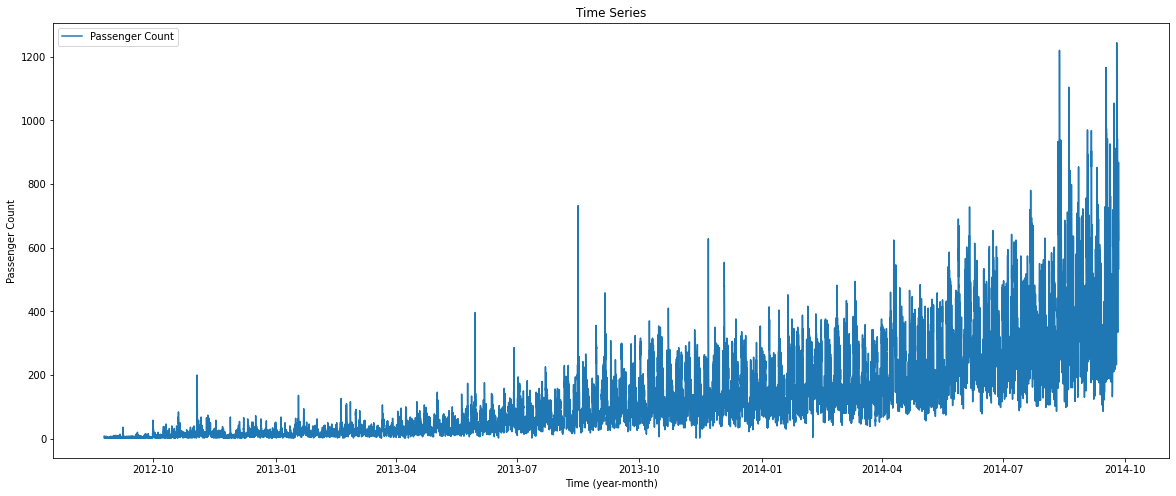

In [20]:
ts = df['Count']


plt.figure(figsize=(20, 8))
plt.plot(ts, label = 'Passenger Count')
plt.title('Time Series')
plt.xlabel("Time (year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc='best')
plt.show()

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

# Exploratory Analysis

**Hypothesis analysis**
1. Traffic will increase as the years pass by. So let's look at the yearly passenger count.

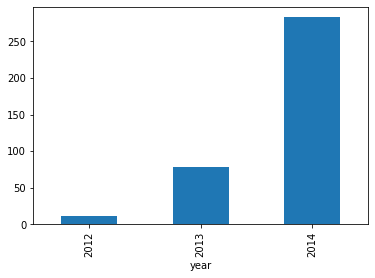

In [21]:
train.groupby('year')['Count'].mean().plot.bar()
plt.show()

2. Traffic increases from May to October. So let's look at the realtion between monthly passenger count.

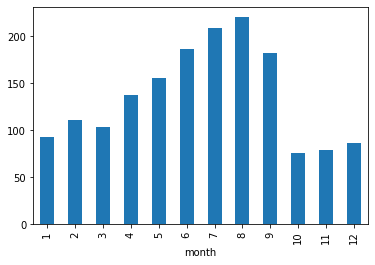

In [22]:
train.groupby('month')['Count'].mean().plot.bar()
plt.show()

We note a decrease in the mean of passenger count in last 3 months. This isn't looking right according to our hypothesis. Let's check monthly mean of each yar seperateley.

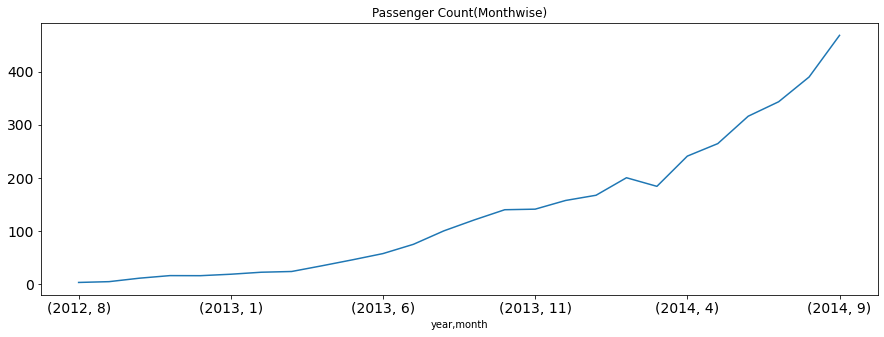

In [23]:
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15, 5), title= 'Passenger Count(Monthwise)', fontsize=14)
plt.show()

Observation:
* We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.

* Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.

* In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.


Now Let’s look at the daily mean of passenger count.

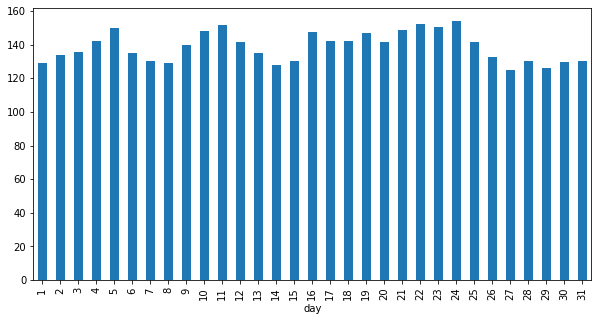

In [24]:
train.groupby('day')['Count'].mean().plot.bar(figsize=(10, 5))
plt.show()

* We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.



3. We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

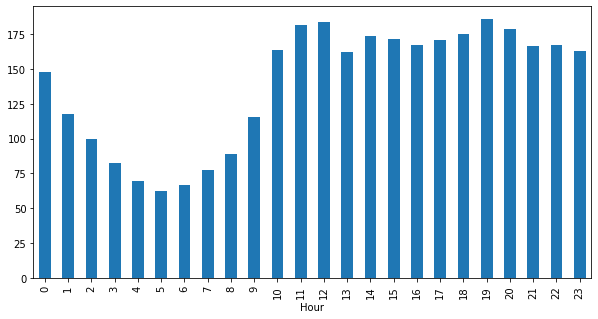

In [25]:
train.groupby('Hour')['Count'].mean().plot.bar(figsize=(10, 5))

* It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.
* After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

4. Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

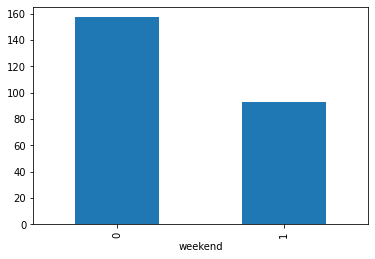

In [26]:
train.groupby('weekend')['Count'].mean().plot.bar()
plt.show()

* It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

Now we will try to look at the day wise passenger count.

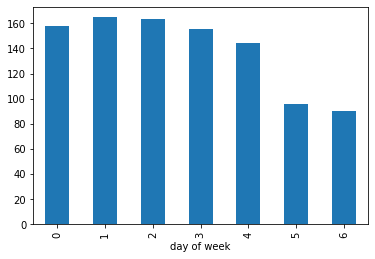

In [27]:
train.groupby('day of week')['Count'].mean().plot.bar()
plt.show()

From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the other days of the week. 

Now we will look at basic modeling techniques. Before that we will drop the ID variable as it has nothing to do with the passenger count.

In [28]:
train.head(1)

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25,0,2012-08-25,8,2012,8,25,0,5,1


In [29]:
train = train.drop('ID', 1)
train.head(1)

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25,2012-08-25,8,2012,8,25,0,5,1


In [30]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-%Y %H:%M')
train.Timestamp.head(2)

Datetime
2012-08-25 00:00:00   2012-08-25 00:00:00
2012-08-25 01:00:00   2012-08-25 01:00:00
Name: Datetime, dtype: datetime64[ns]

In [31]:
train.index = train.Timestamp

train.head(2)

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1


Pandas dataframe.resample() function is primarily used for time series data. Resampling generates a unique sampling distribution on the basis of the actual data. Most commonly used time series frequency are –
* H : hourly frequency
* D : daily frequency
* W : weekly frequency
* M : month end frequency

In [32]:
#Hourly time series
hourly = train.resample('H').mean()
#Converting daily mean
daily = train.resample('D').mean()
#Converting weekly mean
weekly = train.resample('W').mean()
#Converting monthly mean
monthly = train.resample('M').mean()

hourly.shape, daily.shape, weekly.shape, monthly.shape

((18288, 7), (762, 7), (110, 7), (26, 7))

Let's look at the hourly, daily, weekly, monthly time series.

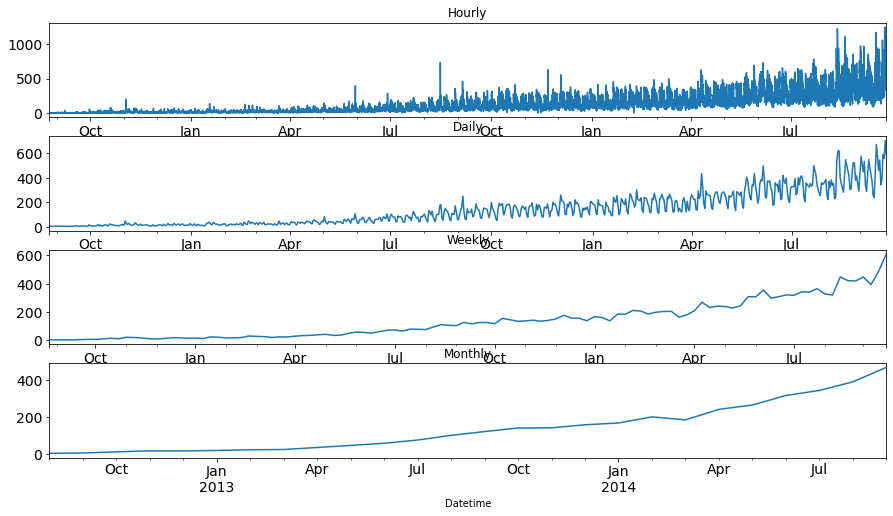

In [33]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15, 8), title = 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15, 8), title = 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15, 8), title = 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15, 8), title = 'Monthly', fontsize=14, ax=axs[3])

plt.show()

We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

/* But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series. */

***Confusion! getting wrong in shape size!***

In [34]:
train.Timestamp = pd.to_datetime(train.Datetime, format = '%d-%m-Y %H:%M')
train.index = train.Timestamp

test.Timestamp = pd.to_datetime(test.Datetime, format= '%d-%m-%Y %H:%M')
test.index = test.Timestamp

#Converting to Hourly mean

train = train.resample('H').mean()
test = test.resample('H').mean()

# #Converting to Daily mean

# print(train.shape)
# train = train.resample('D').mean()
# print(train.shape)
# test = test.resample('H').mean()
# print(test.shape)
# test = test.resample('D').mean()
train.shape, test.shape

((18288, 7), (5112, 5))

In [35]:
train.head(3)

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1


In [36]:
test.head(3)

,ID,year,month,day,Hour
Datetime,,,,,
2014-09-26 00:00:00,18288,2014,9,26,0
2014-09-26 01:00:00,18289,2014,9,26,1
2014-09-26 02:00:00,18290,2014,9,26,2


# Model Creation

In [37]:
train.shape

(18288, 7)

**1. Splitting train and validation set**



In [38]:
train.head(1)

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,8,2012,8,25,0,5,1


In [39]:
train.tail(1)

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2014-09-25 23:00:00,534,2014,9,25,23,3,0


In [40]:
print(train.columns)
train.index

Index(['Count', 'year', 'month', 'day', 'Hour', 'day of week', 'weekend'], dtype='object')


DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
               '2012-08-25 02:00:00', '2012-08-25 03:00:00',
               '2012-08-25 04:00:00', '2012-08-25 05:00:00',
               '2012-08-25 06:00:00', '2012-08-25 07:00:00',
               '2012-08-25 08:00:00', '2012-08-25 09:00:00',
               ...
               '2014-09-25 14:00:00', '2014-09-25 15:00:00',
               '2014-09-25 16:00:00', '2014-09-25 17:00:00',
               '2014-09-25 18:00:00', '2014-09-25 19:00:00',
               '2014-09-25 20:00:00', '2014-09-25 21:00:00',
               '2014-09-25 22:00:00', '2014-09-25 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=18288, freq='H')

In [41]:
Train = train.iloc[:16032]
valid = train.iloc[16032:]

Train.shape, valid.shape

((16032, 7), (2256, 7))

In [42]:
# Train.head(1)
# Train.tail(1)
# valid.head(1)
# valid.tail(1)

In [43]:
# Train = train.ix['2012-08-25':'2014-06-24']      #?????????
# valid = train.ix['2014-06-25':'2014-09-25']

Note.
* We have done time based validation here by selecting the last 3 months for the validation data and rest in the train data. If we would have done it randomly it may work well for the train dataset but will not work effectively on validation dataset.
* Lets understand it in this way: If we choose the split randomly it will take some values from the starting and some from the last years as well. It is similar to predicting the old values based on the future values which is not the case in real scenario. So, this kind of split is used while working with time related problems.

Npw we will look at how the train and validation part has been divided.

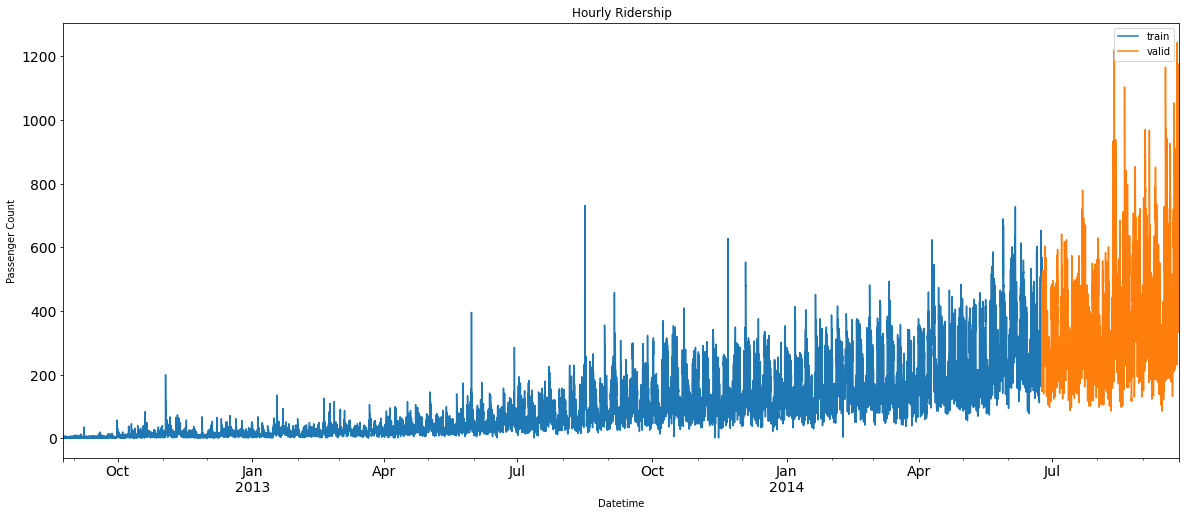

In [44]:
Train.Count.plot(figsize=(20, 8), title= 'Hourly Ridership', fontsize= 14, label='train')
valid.Count.plot(figsize=(20, 8), title= 'Hourly Ridership', fontsize= 14, label= 'valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc= 'best')
plt.show()

**2.1 Naive Approach:** In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction. 

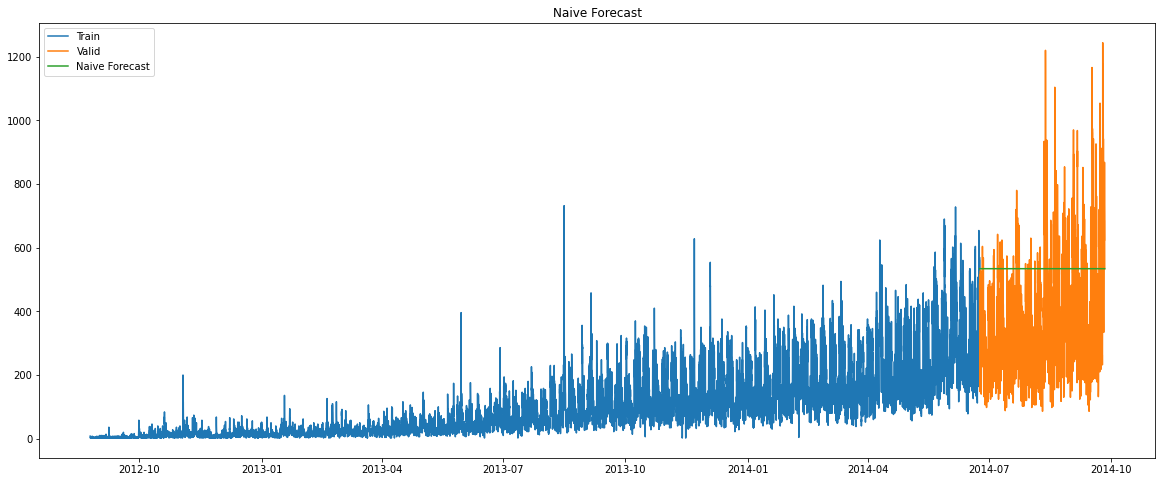

In [45]:
dd = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]    #last observed point

plt.figure(figsize= (20, 8))
plt.plot(Train.index, Train['Count'], label= 'Train')
plt.plot(valid.index, valid['Count'], label= 'Valid')
plt.plot(y_hat.index, y_hat['naive'], label= 'Naive Forecast')
plt.legend()
plt.title('Naive Forecast')
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print('Root mean squared error: ', rms)

Root mean squared error:  235.5866526821624


**2.2 Moving Average:** In this technique we will take the average of the passenger counts for last few time periods only.

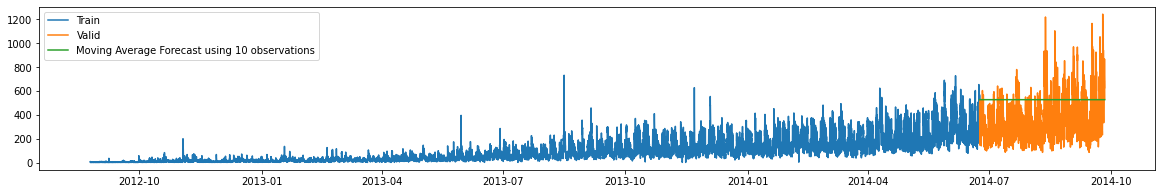

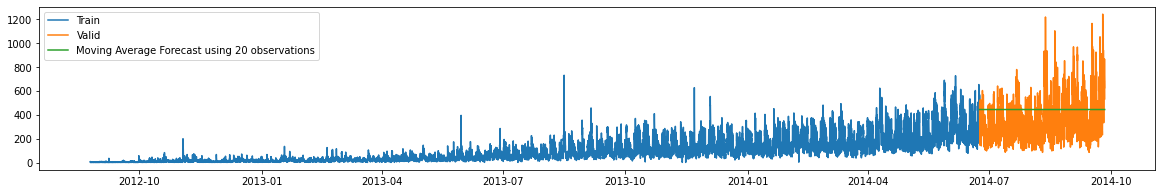

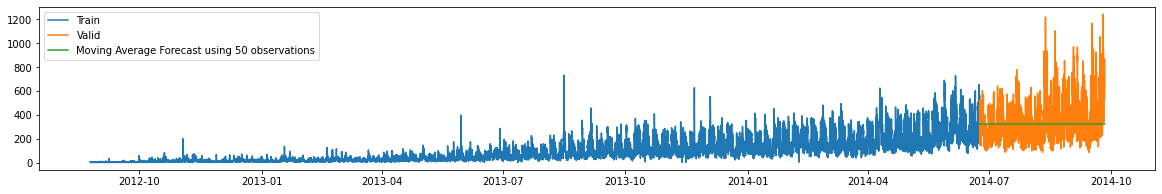

In [61]:
for i in (10, 20, 50):
  y_hat_avg = valid.copy()
  y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(i).mean().iloc[-1]   #average of last i rows of Train data
  plt.figure(figsize=(20, 3))
  plt.plot(Train['Count'], label= 'Train')
  plt.plot(valid['Count'], label = 'Valid')
  plt.plot(y_hat_avg['moving_avg_forecast'], label = 'Moving Average Forecast using ' + str(i) + ' observations')
  plt.legend()
  plt.show()

In [62]:
y_hat_avg.columns

Index(['Count', 'year', 'month', 'day', 'Hour', 'day of week', 'weekend',
       'moving_avg_forecast'],
      dtype='object')

We see that predictions are getting weaker as we increase the number of observations.

In [63]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print('Root mean squared error: ', rms)

Root mean squared error:  197.15320360263016


**2.3 Simple Exponential Smoothing:**
* In this technique, we assign larger weights to more recent observations than to observations from the distant past.
* The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

**Note:** If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

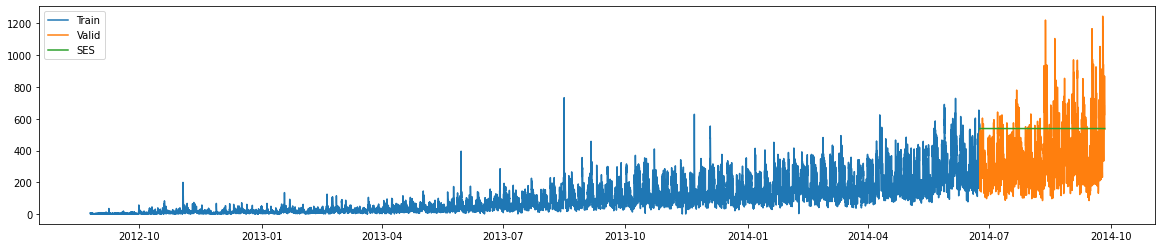

In [66]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6, optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(20, 4))
plt.plot(Train['Count'], label = 'Train')
plt.plot(valid['Count'], label = 'Valid')
plt.plot(y_hat_avg['SES'], label= 'SES')
plt.legend()
plt.show()

In [68]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print('Mean squared error: ', rms)

Mean squared error:  238.31499064246216


**2.4 Holt’s Linear Trend Model:**
* It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
* This method takes into account the ***trend*** of the dataset. The forecast function in this method is a function of level and trend.

First of all let us visualize the trend, seasonality and error in the series.
We can decompose the time series in four parts.
* Observed, which is the original time series.
* Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
* Seasonal, which tells us about the seasonality in the time series.
* Residual, which is obtained by removing any trend or seasonality in the time series.
Lets visualize all these parts.

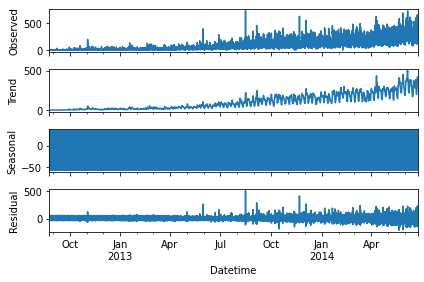

In [72]:
import statsmodels.api as sm


sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

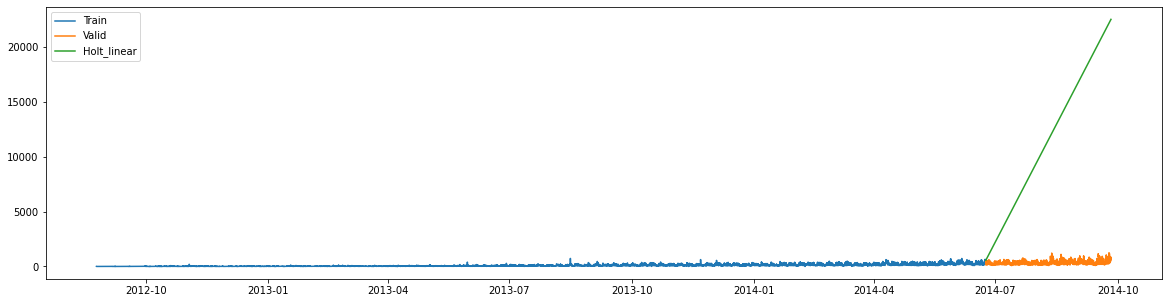

In [77]:
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train.Count)).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(20, 5))
plt.plot(Train['Count'], label= 'Train')
plt.plot(valid['Count'], label= 'Valid')
plt.plot(y_hat_avg['Holt_linear'], label = 'Holt_linear')
plt.legend()
plt.show()

In [78]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print('Mean squared error: ', rms)

Mean squared error:  12796.89915013634


It can be inferred that the RMSE value is rising continuously. So **I think i have done terrible mistake somewhere in the code**. The debugging is out of my scope as per my knowledge! I will code further on **just for the learning** purpose. This code shall not be used as any reference!

Now we will be predicting the passenger count for the test dataset using various models.